# Enhancing NHL Salary Evaluation through Dimensionality Reduction  
Raphaël Fontaine  
McGill University  
Montreal, Canada  
raphael.fontaine@mail.mcgill.ca  

# Baseline

In [29]:
import common
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Dataset

### Load Dataset and Preprocess

In [30]:
original_df = common.load_dataset(preprocess=False)
original_df

,name,season,team,adjustedSalary,salary,capPercentage,playerId,weight,height,nationality,...,OnIce_A_xGoalsFromxReboundsOfShots_other,OnIce_A_xGoalsFromActualReboundsOfShots_other,OnIce_A_reboundxGoals_other,OnIce_A_xGoals_with_earned_rebounds_other,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted_other,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted_other,OffIce_F_xGoals_other,OffIce_A_xGoals_other,OffIce_F_shotAttempts_other,OffIce_A_shotAttempts_other
0,Corey Perry,2013,ANA,11197350,8625000,0.1341,8470621,206.0,190,CAN,...,0.65,0.37,0.37,7.89,7.89,7.86,11.96,9.37,124.0,148.0
1,Ryan Getzlaf,2013,ANA,10713050,8250000,0.1283,8470612,225.0,193,CAN,...,1.08,2.18,2.18,9.92,9.92,9.85,10.18,7.45,113.0,134.0
2,Cam Fowler,2013,ANA,5193700,4000000,0.0622,8475764,206.0,188,USA,...,0.80,0.00,0.00,7.89,7.89,7.83,8.96,8.40,95.0,99.0
3,Francois Beauchemin,2013,ANA,4542400,3500000,0.0544,8467400,208.0,180,CAN,...,1.33,2.00,2.00,9.33,9.33,8.99,9.72,5.87,121.0,83.0
4,Bryan Allen,2013,ANA,4542400,3500000,0.0544,8467332,223.0,196,CAN,...,0.68,2.25,2.25,3.19,3.19,3.13,9.26,6.15,119.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,Colin Miller,2023,WPG,1853700,1850000,0.0222,8476525,196.0,185,CAN,...,0.22,0.85,0.85,4.79,4.79,4.52,10.93,15.17,87.0,95.0
4016,Dylan Samberg,2023,WPG,1402800,1400000,0.0168,8480049,190.0,190,USA,...,0.52,0.81,0.81,1.75,1.75,1.71,9.94,8.43,40.0,95.0
4017,Morgan Barron,2023,WPG,1352700,1350000,0.0162,8480289,220.0,193,CAN,...,0.25,0.55,0.55,1.27,1.27,1.20,9.29,8.58,40.0,105.0
4018,Logan Stanley,2023,WPG,1002000,1000000,0.0120,8479378,228.0,201,CAN,...,0.04,0.00,0.00,0.69,0.69,0.69,3.91,3.41,13.0,32.0


In [31]:
df = common.preprocess_dataset(original_df)
df

,season,adjustedSalary,weight,height,age,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,...,nationality_NOR,nationality_RUS,nationality_SVK,nationality_SVN,nationality_SWE,nationality_USA,shootsCatches_R,position_D,position_L,position_R
0,2013,11197350,206.0,190,28,81,94679.0,1879.0,93.23,0.62,...,0,0,0,0,0,0,1,0,0,1
1,2013,10713050,225.0,193,28,77,98338.0,1943.0,87.28,0.57,...,0,0,0,0,0,0,1,0,0,0
2,2013,5193700,206.0,188,22,70,100224.0,2048.0,35.95,0.53,...,0,0,0,0,0,1,0,1,0,0
3,2013,4542400,208.0,180,33,70,97017.0,1917.0,26.55,0.46,...,0,0,0,0,0,0,0,1,0,0
4,2013,4542400,223.0,196,33,68,71605.0,1642.0,14.35,0.45,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,2023,1853700,196.0,185,31,46,43346.0,1004.0,20.42,0.48,...,0,0,0,0,0,0,1,1,0,0
4016,2023,1402800,190.0,190,24,78,73128.0,1617.0,29.47,0.44,...,0,0,0,0,0,1,0,1,0,0
4017,2023,1352700,220.0,193,25,80,50385.0,1162.0,23.25,0.40,...,0,0,0,0,0,0,0,0,0,0
4018,2023,1002000,228.0,201,25,25,20651.0,458.0,3.58,0.43,...,0,0,0,0,0,0,0,1,0,0


### Split Dataset

In [32]:
# Split features and label
X_data, y_data = common.split_dataset(df)

X_columns = X_data.columns

# Split train and test data
X_train, y_train, X_test, y_test = common.split_train_test(X_data, y_data)

### Dataset Statistics

#### Basic Statistics

In [33]:
print(f"Train data: {X_train.shape[0]} samples")
print(f"Test data: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print(f"Percentage of test data: {X_test.shape[0] / X_data.shape[0] * 100:.2f}%")

Train data: 3581 samples
Test data: 439 samples
Features: 765
Percentage of test data: 10.92%


#### Salary Distribution

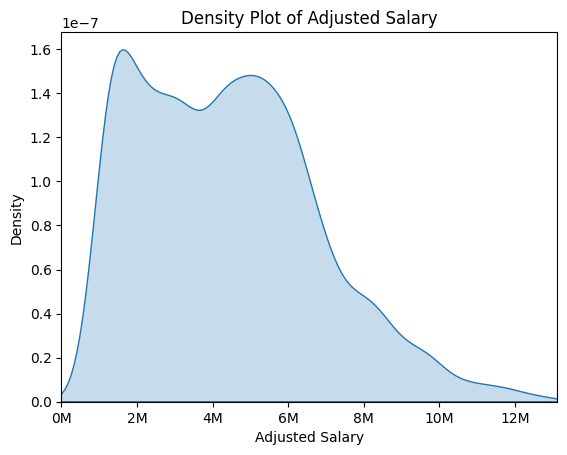

In [34]:
sns.kdeplot(y_data, fill=True)
plt.title('Density Plot of Adjusted Salary')
plt.gca().xaxis.set_major_formatter(common.get_mformatter())
plt.xlim(0, max(y_data))
plt.xlabel('Adjusted Salary')
plt.ylabel('Density')
plt.show()

#### Season Distribution

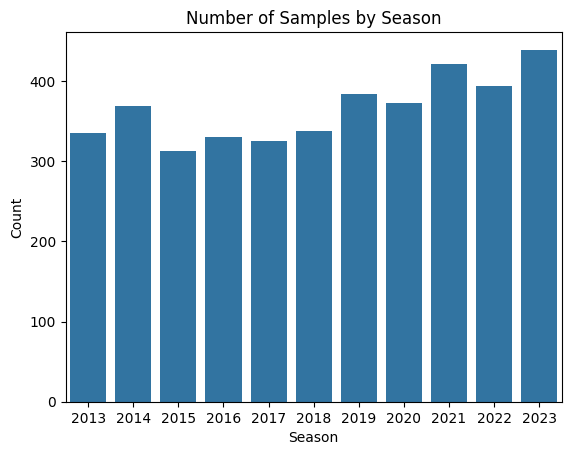

In [35]:
data = X_data['season']
plt.clf()
sns.barplot(x=data.value_counts().index, y=data.value_counts().values)
plt.title('Number of Samples by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

#### Mean Salary by Season

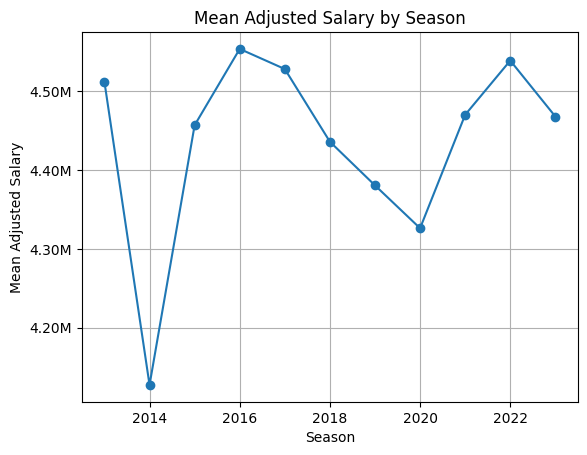

In [36]:
mean_salary = df.groupby('season')['adjustedSalary'].mean()
plt.clf()
plt.plot(mean_salary.index, mean_salary.values, marker='o')
plt.title('Mean Adjusted Salary by Season')
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel('Season')
plt.ylabel('Mean Adjusted Salary')
plt.grid()
plt.show()

## Models

In [37]:
# Standardize the features
X_train, X_test = common.standard_scaler(X_train, X_test)

### Parameters Tuning

#### Random Forest Regressor Tuning

In [ ]:
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=12345))
])

# Hyperparameter tuning
param_grid = {
    'rf__n_estimators': [10, 20, 50],
    'rf__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'rf__max_features': [1, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'rf__criterion': 'squared_error', 'rf__max_features': 'sqrt', 'rf__n_estimators': 50}


#### Support Vector Regressor tuning

In [13]:
pipeline = Pipeline([
    ('svr', SVR())
])

param_grid = {
    'svr__C': [1, 100, 1000],
    'svr__epsilon': [0.1, 0.01, 0.001],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'svr__C': 1000, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}


#### K-Nearest Neighbors Regressor Tuning

In [14]:
pipeline = Pipeline([
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [10,11,12,13,14,15],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__p': 2, 'knn__weights': 'distance'}


### Training and Evaluation

#### Training data

In [38]:
train_results_df, train_predictions = common.train_and_evaluate(X_train, y_train, X_train, y_train)
train_results_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,0.6740,"1,057,512","2,177,704","2,134,722",0.2846,0.50
Random Forest,0.9323,"480,988","1,357,448","1,482,247",0.1374,6.46
Support Vector,0.5856,"1,160,698","3,341,279","3,774,270",0.2987,5.54
K-Nearest Neighbors,1.0000,0,0,0,0.0000,0.02


#### Testing data

In [39]:
test_results_df, test_predictions = common.train_and_evaluate(X_train, y_train, X_test, y_test)
test_results_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,0.5000,"1,445,622","1,957,624","2,272,306",0.3712,0.62
Random Forest,0.5693,"1,351,450","1,771,227","2,198,727",0.3462,6.82
Support Vector,0.5814,"1,293,746","1,902,587","2,425,087",0.3263,5.56
K-Nearest Neighbors,0.5568,"1,352,233","2,011,678","2,576,639",0.3426,0.02


### Results Analysis

In [18]:
# Create a DataFrame with the congregated results from Support Vector Regression
predictions = test_predictions[2]
names = original_df[original_df["season"] == 2023]["name"].values
salaries = y_test
diff = predictions - salaries
abs_diff = np.abs(diff)

results_df = pd.DataFrame({
    "Name": names,
    "Salary": salaries,
    "Prediction": predictions,
    "Difference": diff,
    "Abs difference": abs_diff
})

results_df.set_index("Name", inplace=True)
numeric_cols = results_df.select_dtypes(include=['number']).columns

#### Overpaid Players

In [27]:
overpaid_df = results_df.sort_values(by="Difference", ascending=True)
overpaid_df.head(10).style.format({col: '{:,.0f}' for col in numeric_cols})

,Salary,Prediction,Difference,Abs difference
Name,,,,
Tyler Seguin,"9,853,000","3,670,927","-6,182,073","6,182,073"
Jamie Benn,"9,502,300","4,645,998","-4,856,302","4,856,302"
Dmitry Orlov,"7,748,800","3,115,172","-4,633,628","4,633,628"
Darnell Nurse,"9,251,800","4,659,247","-4,592,553","4,592,553"
Connor McDavid,"12,499,950","8,085,991","-4,413,959","4,413,959"
Marc-Edouard Vlasic,"6,997,300","2,610,566","-4,386,734","4,386,734"
Drew Doughty,"10,996,950","6,611,234","-4,385,716","4,385,716"
Pierre-Luc Dubois,"8,500,300","4,126,454","-4,373,846","4,373,846"
Jacob Trouba,"7,999,300","3,651,010","-4,348,290","4,348,290"


#### Underpaid Players

In [28]:
underpaid_df = results_df.sort_values(by="Difference", ascending=False)
underpaid_df.head(10).style.format({col: '{:,.0f}' for col in numeric_cols})

,Salary,Prediction,Difference,Abs difference
Name,,,,
Owen Tippett,"1,503,000","5,931,997","4,428,997","4,428,997"
Sean Monahan,"1,987,300","6,185,321","4,198,021","4,198,021"
Fabian Zetterlund,"1,452,900","5,571,977","4,119,077","4,119,077"
Sean Durzi,"1,703,400","5,448,178","3,744,778","3,744,778"
Cam York,"1,603,200","5,297,559","3,694,359","3,694,359"
Philipp Kurashev,"2,246,150","5,889,607","3,643,457","3,643,457"
Mike Matheson,"4,876,400","8,358,199","3,481,799","3,481,799"
Casey Mittelstadt,"2,496,650","5,934,007","3,437,357","3,437,357"
Ryan Hartman,"1,703,400","4,893,939","3,190,539","3,190,539"


#### Highest Paid Players

In [21]:
highest_df = results_df.sort_values(by="Salary", ascending=False)
highest_df.head(10).style.format({col: '{:,.0f}' for col in numeric_cols})

,Salary,Prediction,Difference,Abs difference
Name,,,,
Nathan MacKinnon,"12,600,150","10,263,599","-2,336,551","2,336,551"
Connor McDavid,"12,499,950","8,085,991","-4,413,959","4,413,959"
Artemi Panarin,"11,639,900","8,835,594","-2,804,306","2,804,306"
Auston Matthews,"11,639,900","8,471,733","-3,168,167","3,168,167"
Erik Karlsson,"11,497,950","7,505,942","-3,992,008","3,992,008"
David Pastrnak,"11,247,450","8,226,533","-3,020,917","3,020,917"
Drew Doughty,"10,996,950","6,611,234","-4,385,716","4,385,716"
John Tavares,"10,996,950","8,088,330","-2,908,620","2,908,620"
Mitch Marner,"10,905,100","6,874,046","-4,031,054","4,031,054"


#### Density Plots

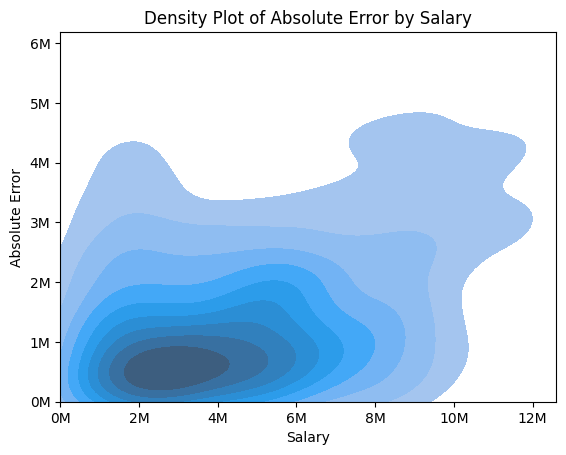

In [24]:
sns.kdeplot(data=results_df, x="Salary", y="Abs difference", fill=True)

plt.gca().xaxis.set_major_formatter(common.get_mformatter(precision=0))
plt.gca().yaxis.set_major_formatter(common.get_mformatter(precision=0))

plt.title('Density Plot of Absolute Error by Salary')
plt.xlabel('Salary')
plt.ylabel('Absolute Error')
plt.xlim(0, max(results_df["Salary"]))
plt.ylim(0, max(results_df["Abs difference"]))
plt.show()

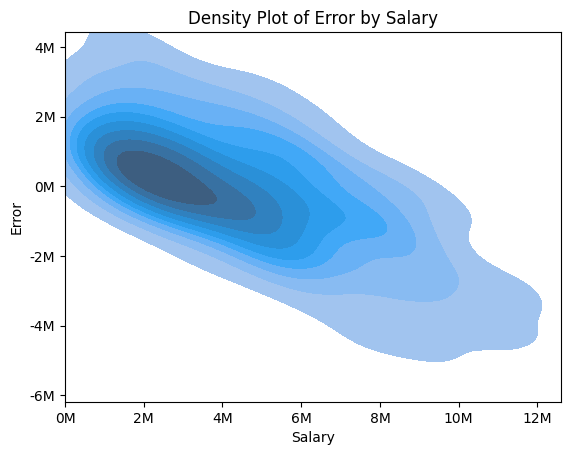

In [25]:
sns.kdeplot(data=results_df, x="Salary", y="Difference", fill=True)

plt.gca().xaxis.set_major_formatter(common.get_mformatter(precision=0))
plt.gca().yaxis.set_major_formatter(common.get_mformatter(precision=0))

plt.title('Density Plot of Error by Salary')
plt.xlabel('Salary')
plt.ylabel('Error')
plt.xlim(0, max(results_df["Salary"]))
plt.ylim(min(results_df["Difference"]), max(results_df["Difference"]))
plt.show()